In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [103]:
train=pd.read_csv("/Users/bruce/Desktop/datasets/pima/pima.csv")

In [104]:
train.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1

In [105]:
train.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness     Insulin  \
count    768.000000  768.000000     768.000000     768.000000  768.000000   
mean       3.845052  120.894531      69.105469      20.536458   79.799479   
std        3.369578   31.972618      19.355807      15.952218  115.244002   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      62.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   30.500000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

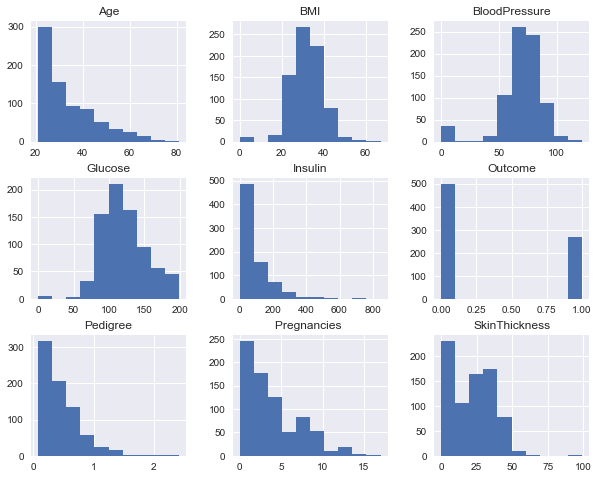

In [106]:
train.hist(figsize=(10,8))
plt.show()

# check missing values

In [107]:
train.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [108]:
train['Glucose'] = train['Glucose'].replace('0', np.nan)
train['BloodPressure'] = train['BloodPressure'].replace('0', np.nan) 
train['SkinThickness'] = train['SkinThickness'].replace('0', np.nan) 
train['Insulin'] = train['Insulin'].replace('0', np.nan)        
train['BMI'] = train['BMI'].replace('0', np.nan) 
train['Pedigree'] = train['Pedigree'].replace('0', np.nan) 
train['Age'] = train['Age'].replace('0', np.nan) 

train.head(8)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0      NaN  33.6   
1             1     85.0           66.0           29.0      NaN  26.6   
2             8    183.0           64.0            NaN      NaN  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
5             5    116.0           74.0            NaN      NaN  25.6   
6             3     78.0           50.0           32.0     88.0  31.0   
7            10    115.0            NaN            NaN      NaN  35.3   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
5     0.201   30        0  
6     0.248   26        1  
7     0.134   29        0

In [109]:
train.isnull().sum()


Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Outcome            0
dtype: int64

In [110]:
train['BMI'].fillna(train['BMI'].median(), inplace=True)
train['Glucose'].fillna(train['Glucose'].median(), inplace=True)
train['BloodPressure'].fillna(train['BloodPressure'].median(), inplace=True)
train['SkinThickness'].fillna(train['SkinThickness'].median(), inplace=True)
train['Insulin'].fillna(train['Insulin'].median(), inplace=True)

train.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness     Insulin  \
count    768.000000  768.000000     768.000000     768.000000  768.000000   
mean       3.845052  121.656250      72.386719      29.108073  140.671875   
std        3.369578   30.438286      12.096642       8.791221   86.383060   
min        0.000000   44.000000      24.000000       7.000000   14.000000   
25%        1.000000   99.750000      64.000000      25.000000  121.500000   
50%        3.000000  117.000000      72.000000      29.000000  125.000000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.455208    0.471876   33.240885    0.348958  
std      6.875177    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.000000    0.000000  
50%     32.300000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

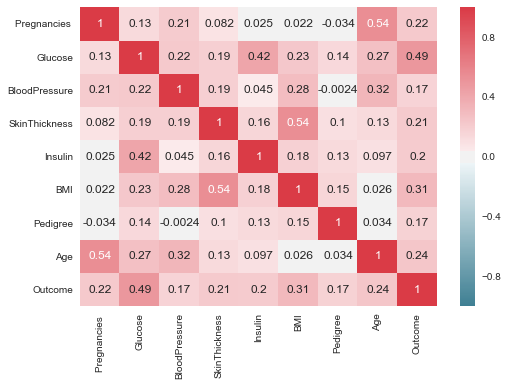

In [111]:
corr=train[train.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,annot=True)
sns.plt.show()

In [112]:
features=train.drop("Outcome",axis=1)
outcomes=train["Outcome"].values
features.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0    125.0  33.6   
1             1     85.0           66.0           29.0    125.0  26.6   
2             8    183.0           64.0           29.0    125.0  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   

   Pedigree  Age  
0     0.627   50  
1     0.351   31  
2     0.672   32  
3     0.167   21  
4     2.288   33

In [100]:
for i in features.columns: 
    scaler = preprocessing.StandardScaler()
    features[i] = scaler.fit_transform(features[i])

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [113]:
train.to_csv("/Users/bruce/Desktop/datasets/pima/pima_new.csv")

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [115]:
X_train.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
235             4    171.0           72.0           29.0    125.0  43.6   
576             6    108.0           44.0           20.0    130.0  24.0   
22              7    196.0           90.0           29.0    125.0  39.8   
451             2    134.0           70.0           29.0    125.0  28.9   
616             6    117.0           96.0           29.0    125.0  28.7   

     Pedigree  Age  
235     0.479   26  
576     0.813   35  
22      0.451   41  
451     0.542   23  
616     0.157   30

# randomforest by Sklearn

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [17]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))


Ranom Forest         74.31 (+/-) 3.15 


# RANDOM FORESR BAGGING

In [18]:
final_model = RandomForestClassifier(n_estimators=100,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[111  10]
 [ 40  31]]
73.9583333333
             precision    recall  f1-score   support

          0       0.74      0.92      0.82       121
          1       0.76      0.44      0.55        71

avg / total       0.74      0.74      0.72       192



# TURNING OFF BAGGING

In [19]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[104  17]
 [ 36  35]]
72.3958333333
             precision    recall  f1-score   support

          0       0.74      0.86      0.80       121
          1       0.67      0.49      0.57        71

avg / total       0.72      0.72      0.71       192



In [21]:
final_model = RandomForestClassifier(n_estimators=100,max_features=None,bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[109  12]
 [ 34  37]]
76.0416666667
             precision    recall  f1-score   support

          0       0.76      0.90      0.83       121
          1       0.76      0.52      0.62        71

avg / total       0.76      0.76      0.75       192



# Random forest by Xgboost

In [23]:

from sklearn.model_selection import GridSearchCV

model=XGBClassifier(num_boost_round=1,subsample=0.632)

paramaters = {
    'max_depth': [2, 3,4,5],
    'n_estimators':  [100,300,500,1000],
    'colsample_bytree':[np.log2(len(X_train.columns))/len(X_train.columns),
                        np.sqrt(len(X_train.columns))/len(X_train.columns)]
}
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

('Best accuracy : ', 0.78125)
('Best parameters :', {'n_estimators': 100, 'colsample_bytree': 0.375, 'max_depth': 2})


In [41]:
from xgboost import XGBClassifier
final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.375)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

from sklearn.metrics import roc_curve, auc
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(Y_test, y_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
print(roc_auc1)

[[103  18]
 [ 31  40]]
74.4791666667
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       121
          1       0.69      0.56      0.62        71

avg / total       0.74      0.74      0.74       192

0.707309975556


In [42]:
final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

from sklearn.metrics import roc_curve, auc
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(Y_test, y_pred)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
print(roc_auc2)





[[102  19]
 [ 29  42]]
75.0
             precision    recall  f1-score   support

          0       0.78      0.84      0.81       121
          1       0.69      0.59      0.64        71

avg / total       0.75      0.75      0.75       192

0.717262251193


In [43]:
final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=5,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)


from sklearn.metrics import roc_curve, auc
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(Y_test, y_pred)
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
print(roc_auc3)





[[111  10]
 [ 46  25]]
70.8333333333
             precision    recall  f1-score   support

          0       0.71      0.92      0.80       121
          1       0.71      0.35      0.47        71

avg / total       0.71      0.71      0.68       192

0.634734023979


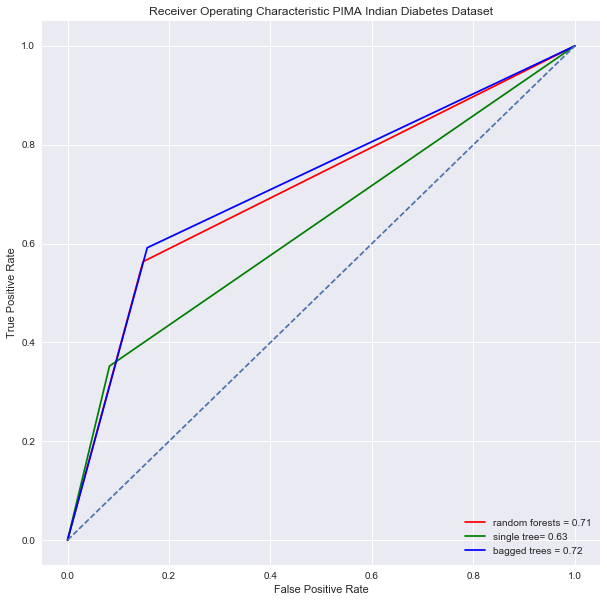

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic PIMA Indian Diabetes Dataset')
plt.plot(false_positive_rate1,true_positive_rate1, color='red',label = 'random forests = %0.2f' % roc_auc1)
plt.plot(false_positive_rate3,true_positive_rate3, color='green',label = 'single tree= %0.2f' % roc_auc3)
plt.plot(false_positive_rate2,true_positive_rate2, color='blue',label = 'bagged trees = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

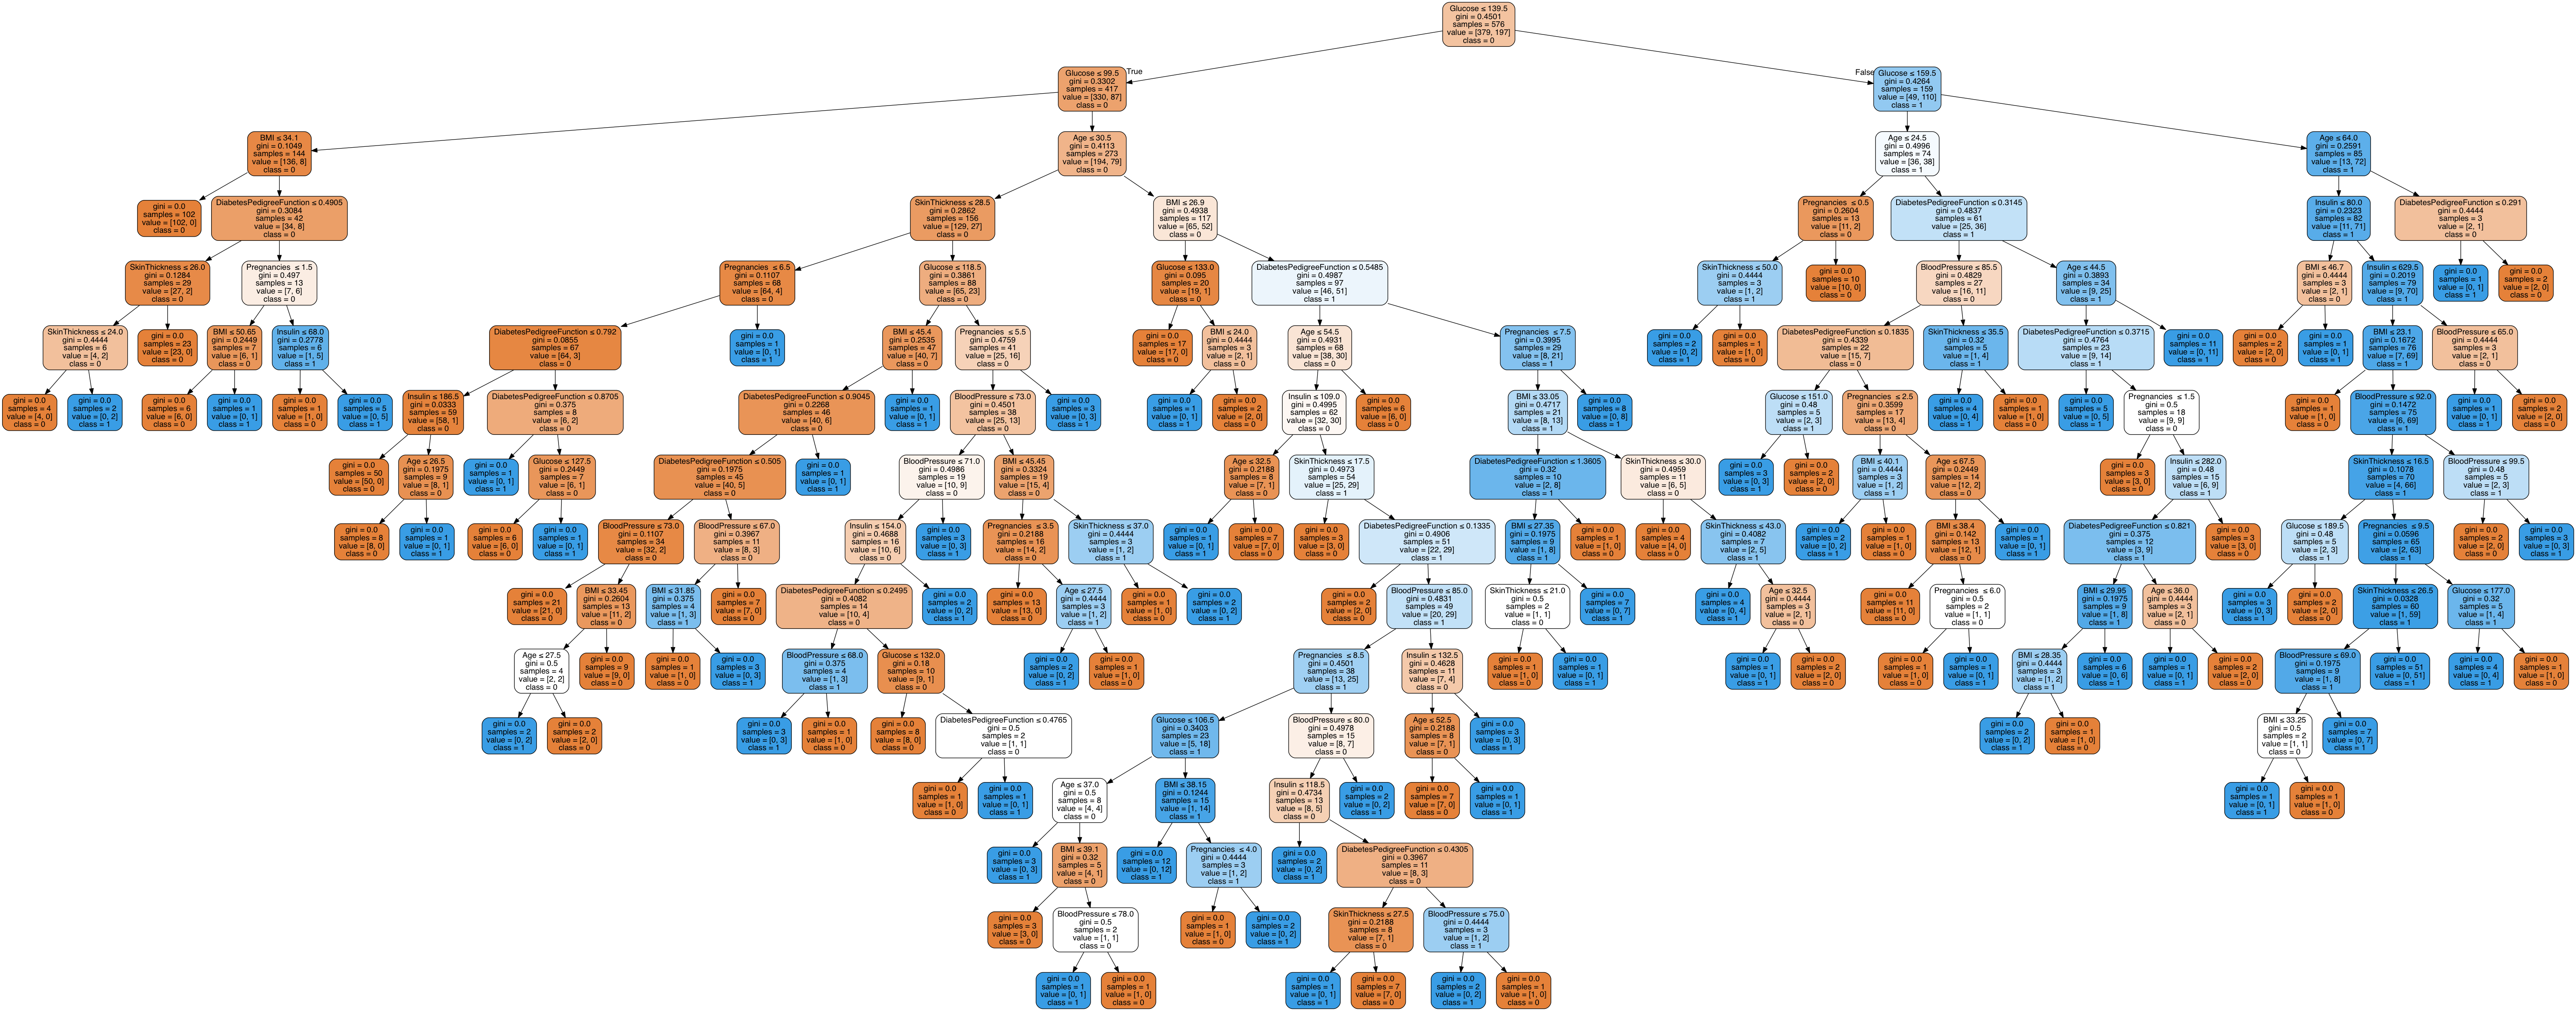

In [197]:
from graphviz import Digraph
import pydotplus
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                         class_names=['0','1'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 












In [198]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test, y_pred)
print(cf)
print(accuracy_score(Y_test, y_pred) * 100) 

#Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred)
print(report)

[[95 26]
 [27 44]]
72.3958333333
             precision    recall  f1-score   support

          0       0.78      0.79      0.78       121
          1       0.63      0.62      0.62        71

avg / total       0.72      0.72      0.72       192



In [17]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout, Input
from keras import optimizers
history=History()

In [18]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

Train on 518 samples, validate on 58 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.65289, saving model to best.model
0s - loss: 0.8032 - acc: 0.6564 - val_loss: 0.6529 - val_acc: 0.6552
Epoch 2/200
Epoch 00001: val_loss improved from 0.65289 to 0.64299, saving model to best.model
0s - loss: 0.7492 - acc: 0.5965 - val_loss: 0.6430 - val_acc: 0.6552
Epoch 3/200
Epoch 00002: val_loss improved from 0.64299 to 0.64124, saving model to best.model
0s - loss: 0.7554 - acc: 0.5502 - val_loss: 0.6412 - val_acc: 0.6552
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.7342 - acc: 0.6100 - val_loss: 0.6506 - val_acc: 0.6552
Epoch 5/200
Epoch 00004: val_loss did not improve
0s - loss: 0.7716 - acc: 0.5753 - val_loss: 0.6637 - val_acc: 0.6552
Epoch 6/200
Epoch 00005: val_loss did not improve
0s - loss: 0.7922 - acc: 0.6023 - val_loss: 0.6597 - val_acc: 0.6552
Epoch 7/200
Epoch 00006: val_loss improved from 0.64124 to 0.64122, saving model to best.model
0s - loss: 0.75

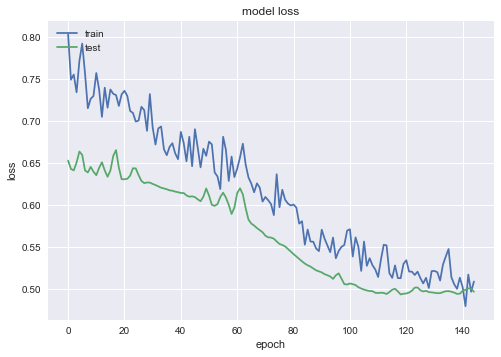

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
m.load_weights("best.model")

In [21]:
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[110  11]
 [ 53  18]]
66.6666666667
             precision    recall  f1-score   support

          0       0.67      0.91      0.77       121
          1       0.62      0.25      0.36        71

avg / total       0.65      0.67      0.62       192



In [23]:
train.columns

Index([u'Pregnancies ', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')

In [49]:
title=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [139]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
from matplotlib.pyplot import imshow
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))







hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)


value_list=[X_train[['Glucose']].values,
            X_train[['BMI']].values,
            X_train[['Age']].values,
            X_train[['Insulin']].values,
            X_train[['Pedigree']].values,
            X_train[['SkinThickness']].values,
            X_train[['BloodPressure']].values,
            X_train[['Pregnancies ']].values
           ]

value_list_test=[X_test[['Glucose']].values,
                X_test[['BMI']].values,
                X_test[['Age']].values,
                X_test[['Insulin']].values,
                X_test[['Pedigree']].values,
                X_test[['SkinThickness']].values,
                X_test[['BloodPressure']].values,
                X_test[['Pregnancies ']].values
                
                ]

x = keras.layers.concatenate([hidden_1, hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=32, 
)


Train on 518 samples, validate on 58 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.71813, saving model to best.model
0s - loss: 0.6874 - acc: 0.6313 - val_loss: 0.7181 - val_acc: 0.3448
Epoch 2/200
Epoch 00001: val_loss improved from 0.71813 to 0.64120, saving model to best.model
0s - loss: 0.6635 - acc: 0.5965 - val_loss: 0.6412 - val_acc: 0.6552
Epoch 3/200
Epoch 00002: val_loss improved from 0.64120 to 0.62991, saving model to best.model
0s - loss: 0.6494 - acc: 0.6583 - val_loss: 0.6299 - val_acc: 0.6552
Epoch 4/200
Epoch 00003: val_loss improved from 0.62991 to 0.62267, saving model to best.model
0s - loss: 0.6251 - acc: 0.6583 - val_loss: 0.6227 - val_acc: 0.6552
Epoch 5/200
Epoch 00004: val_loss improved from 0.62267 to 0.61809, saving model to best.model
0s - loss: 0.6141 - acc: 0.6641 - val_loss: 0.6181 - val_acc: 0.6552
Epoch 6/200
Epoch 00005: val_loss improved from 0.61809 to 0.59618, saving model to best.model
0s - loss: 0.6068 - acc: 0.6834 - val_loss: 

In [140]:
for layer in model.layers:
    weights=layer.get_weights()

In [141]:
model.layers[10].get_weights()

[array([[-0.04592838,  0.00855012, -0.10518046, -0.12101988, -0.13993959,
         -0.12736584,  0.0935614 , -0.12957083,  0.23757772,  0.07223555,
         -0.1379382 , -0.12673643,  0.37899286, -0.13205701, -0.11030288,
         -0.12452537,  0.01579387,  0.08960958, -0.07117444,  0.07349179,
          0.00358505, -0.11387028, -0.10736826,  0.08260293, -0.10542504,
         -0.11160798, -0.14973007, -0.10855926, -0.11346161, -0.15690523,
         -0.04583383, -0.12762222]], dtype=float32),
 array([-0.09029106, -0.26803827,  0.10454172,  0.19064024,  0.2791979 ,
         0.24129857, -0.15099972,  0.25030372,  0.08657921, -0.04546116,
         0.25742918,  0.23800831,  0.07865819,  0.25891203,  0.15867709,
         0.17379373, -0.02301685, -0.1704306 , -0.02913409, -0.10122285,
        -0.11860235,  0.18515159,  0.16257128, -0.23416518,  0.14298683,
         0.16700609,  0.30144992,  0.14523375,  0.18532763,  0.28391454,
        -0.06648771,  0.22411707], dtype=float32)]

In [119]:
print(model.layers)

[<keras.engine.topology.InputLayer object at 0x11b59afd0>, <keras.engine.topology.InputLayer object at 0x11f134d10>, <keras.engine.topology.InputLayer object at 0x11cb63590>, <keras.engine.topology.InputLayer object at 0x11cb63890>, <keras.engine.topology.InputLayer object at 0x11cb63a10>, <keras.engine.topology.InputLayer object at 0x11cb63210>, <keras.engine.topology.InputLayer object at 0x11cb63bd0>, <keras.engine.topology.InputLayer object at 0x11cb63090>, <keras.layers.core.Dense object at 0x11cb63950>, <keras.layers.core.Dense object at 0x11cb63d10>, <keras.layers.core.Dense object at 0x11cb634d0>, <keras.layers.core.Dense object at 0x11db73c10>, <keras.layers.core.Dense object at 0x11c9dcc90>, <keras.layers.core.Dense object at 0x11d52c5d0>, <keras.layers.core.Dense object at 0x11cb512d0>, <keras.layers.core.Dense object at 0x11e0434d0>, <keras.layers.merge.Concatenate object at 0x11d444350>, <keras.layers.core.Dense object at 0x11e5c0590>, <keras.layers.core.Dense object at 0x1

In [126]:
np.unique(X_train['Age'].values)

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 81])

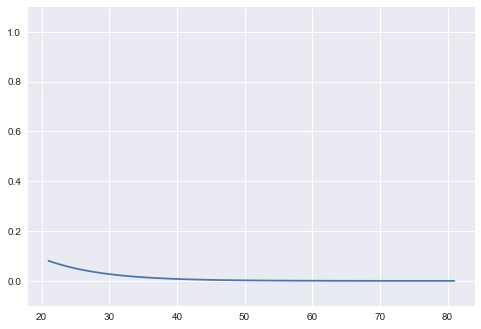

In [142]:
we = [np.array([[-0.12736584]]), np.array([0.24129857])]
model = Sequential()
model.add(Dense(1, input_dim=1, weights=we, activation='sigmoid'))
pred = model.predict(np.unique(X_train['Age'].values))

plt.ylim(-.1,1.1)
plt.plot(np.unique(X_train['Age'].values),pred)
plt.show()

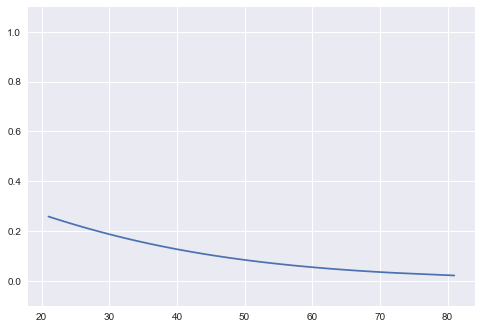

In [143]:
we = [np.array([[-0.04592838]]), np.array([-0.09029106])]
model = Sequential()
model.add(Dense(1, input_dim=1, weights=we, activation='sigmoid'))
pred = model.predict(np.unique(X_train['Age'].values))

plt.ylim(-.1,1.1)
plt.plot(np.unique(X_train['Age'].values),pred)
plt.show()

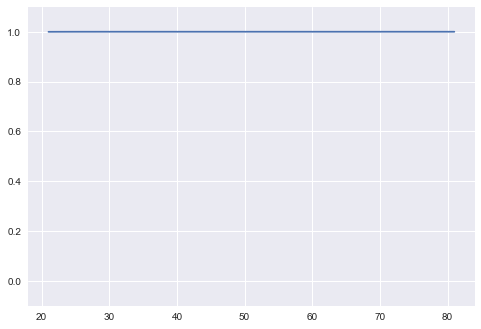

In [146]:
we = [np.array([[0.37899286]]), np.array([0.078])]
model = Sequential()
model.add(Dense(1, input_dim=1, weights=we, activation='sigmoid'))
pred = model.predict(np.unique(X_train['Age'].values))

plt.ylim(-.1,1.1)
plt.plot(np.unique(X_train['Age'].values),pred)
plt.show()

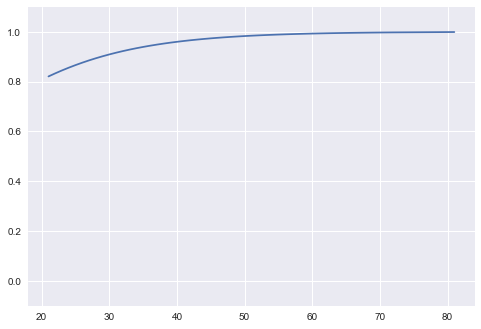

In [132]:
we = [np.array([[0.08673703]]), np.array([-0.30097628])]
model = Sequential()
model.add(Dense(1, input_dim=1, weights=we, activation='sigmoid'))
pred = model.predict(np.unique(X_train['Age'].values))

plt.ylim(-.1,1.1)
plt.plot(np.unique(X_train['Age'].values),pred)
plt.show()

In [54]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[107  14]
 [ 32  39]]
76.0416666667
             precision    recall  f1-score   support

          0       0.77      0.88      0.82       121
          1       0.74      0.55      0.63        71

avg / total       0.76      0.76      0.75       192



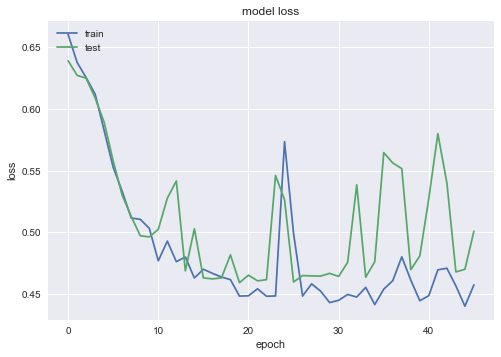

In [56]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
len(np.unique(X_train['Age']))

51

In [202]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


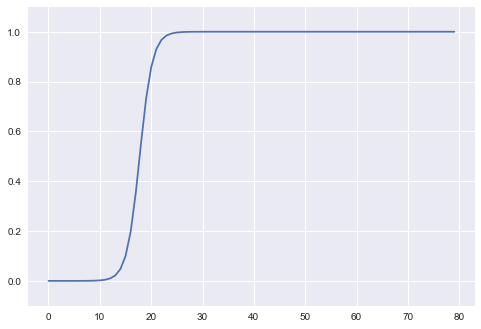

In [32]:
we = [np.array([[0.8]]), np.array([-15])]
model = Sequential()
model.add(Dense(1, input_dim=1, weights=we, activation='sigmoid'))
pred = model.predict(np.array([[i] for i in np.arange(1,81,1)]))
plt.ylim(-.1,1.1)
plt.plot(pred)
plt.show()

In [171]:
pred

array([[  4.13993746e-08],
       [  1.12535162e-07],
       [  3.05902233e-07],
       [  8.31528041e-07],
       [  2.26032421e-06],
       [  6.14417468e-06],
       [  1.67014223e-05],
       [  4.53978682e-05],
       [  1.23394580e-04],
       [  3.35350138e-04],
       [  9.11051175e-04],
       [  2.47262325e-03],
       [  6.69285096e-03],
       [  1.79862101e-02],
       [  4.74258736e-02],
       [  1.19202919e-01],
       [  2.68941432e-01],
       [  5.00000000e-01],
       [  7.31058598e-01],
       [  8.80797088e-01],
       [  9.52574134e-01],
       [  9.82013762e-01],
       [  9.93307173e-01],
       [  9.97527361e-01],
       [  9.99088943e-01],
       [  9.99664664e-01],
       [  9.99876618e-01],
       [  9.99954581e-01],
       [  9.99983311e-01],
       [  9.99993861e-01],
       [  9.99997735e-01],
       [  9.99999166e-01],
       [  9.99999702e-01],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
       [  1.00000000e+00],
 

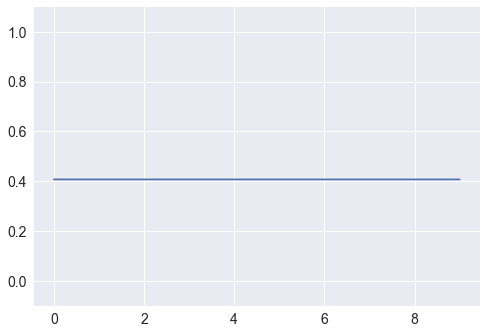

In [157]:
we = [np.array([[1]]), np.array([20])]
# we2 = [np.array([[2]]), np.array([15.5])]
# we3 = [np.array([[1.25]]), np.array([50.5])]
input_1 = Input(shape=(1,))
we = [np.array([[0.001]]), np.array([0.00001])]






hidden_1_1 = Dense(1, input_dim=1, weights=we, activation='sigmoid')(input_1)
# hidden_1_2 = Dense(1, input_dim=1, weights=we2, activation='sigmoid')(input_1)
# hidden_1_3=  Dense(1, input_dim=1, weights=we3, activation='sigmoid')(input_1)
# x = keras.layers.concatenate([hidden_1_1,hidden_1_2, hidden_1_3])
x = Dense(1, activation='sigmoid')(hidden_1_1)



model = Model(inputs=[input_1], outputs=[x])

pred = model.predict(np.array([[i] for i in np.arange(1,2,0.1)]))
plt.plot(pred)
plt.ylim(-.1,1.1)


plt.show()









In [132]:
np.arange(10,80,1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])

In [98]:
def fit():
    input_1 = Input(shape=(1,))
    hidden_1 = Dense(32, activation='sigmoid')(input_1)
    model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8], outputs=[output])
    model.fit(X, Y, nb_epoch=800, verbose=0)
    return model

# neural network ensemble 

In [118]:
data_train,data_val=train_test_split(train,test_size=0.25, random_state=10)
X_val=data_val.drop(['Outcome'], axis=1).values
y_val=data_val['Outcome'].ravel()

In [119]:
def train_nn_simple(data_train,X_val,y_val):
    

    data_train_new=data_train.sample(frac=0.632,replace=True)
    X_train=data_train_new.drop(['Outcome'], axis=1).values
    y_train=data_train_new['Outcome'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_val).argmax(axis=1)]
    return y_pred
    

In [121]:
result=[]
for i in range(50):
    y_pred=train_nn_simple(train,X_val,y_val)
    result.append(y_pred)

Train on 388 samples, validate on 97 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.64591, saving model to best.model
0s - loss: 0.9023 - acc: 0.4639 - val_loss: 0.6459 - val_acc: 0.6701
Epoch 2/200
Epoch 00001: val_loss did not improve
0s - loss: 0.7395 - acc: 0.5696 - val_loss: 0.6480 - val_acc: 0.6701
Epoch 3/200
Epoch 00002: val_loss did not improve
0s - loss: 0.8398 - acc: 0.5696 - val_loss: 0.6758 - val_acc: 0.6701
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.8482 - acc: 0.6031 - val_loss: 0.6638 - val_acc: 0.6701
Epoch 5/200
Epoch 00004: val_loss improved from 0.64591 to 0.64156, saving model to best.model
0s - loss: 0.7807 - acc: 0.6108 - val_loss: 0.6416 - val_acc: 0.6701
Epoch 6/200
Epoch 00005: val_loss improved from 0.64156 to 0.63117, saving model to best.model
0s - loss: 0.7405 - acc: 0.6005 - val_loss: 0.6312 - val_acc: 0.6701
Epoch 7/200
Epoch 00006: val_loss did not improve
0s - loss: 0.7731 - acc: 0.5902 - val_loss: 0.6338 - val_acc

In [122]:
print(len(result))

50


In [123]:
result_new=np.array(result)
result_new

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1]])

In [124]:
result_new1=result_new.sum(axis=0)
result_new1

array([25,  0, 11,  0,  0,  0,  0,  1,  0,  2,  0,  0, 50,  2,  0, 49, 50,
        0,  0, 50,  0, 32, 28, 12,  0, 50,  4, 23, 11, 50,  0,  0,  0,  0,
       31,  0, 11,  0, 50,  0,  8,  0, 45, 10, 49,  0, 46,  0, 23,  0,  0,
       50,  0, 22,  5,  0,  0,  1,  0,  0,  0,  0,  0, 24,  0, 19, 50,  0,
        0, 50, 39,  3, 21, 50,  0,  0, 44, 50,  0,  0,  0, 50,  0,  0,  1,
       50, 31, 41, 50,  0,  0, 42,  0,  0,  0,  0, 50,  0,  0,  3, 50,  0,
       45,  1,  0, 35, 50, 50,  0, 50,  0, 49,  0,  0,  8,  0,  0,  6,  0,
       50,  0,  0,  0, 11, 38, 29,  0,  0, 41,  0, 50,  1, 46,  0,  0,  0,
       15,  5, 49, 47,  0,  0,  9,  0, 41, 31, 47, 50, 50,  0,  2,  0, 50,
        0, 50,  0,  0,  4,  0,  0, 13, 50,  0,  0, 27, 14,  0, 25,  0, 17,
       49,  0,  0, 47, 50,  2,  0, 43,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0, 50])

In [125]:
re=result_new1.tolist()
re

[25,
 0,
 11,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 50,
 2,
 0,
 49,
 50,
 0,
 0,
 50,
 0,
 32,
 28,
 12,
 0,
 50,
 4,
 23,
 11,
 50,
 0,
 0,
 0,
 0,
 31,
 0,
 11,
 0,
 50,
 0,
 8,
 0,
 45,
 10,
 49,
 0,
 46,
 0,
 23,
 0,
 0,
 50,
 0,
 22,
 5,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 24,
 0,
 19,
 50,
 0,
 0,
 50,
 39,
 3,
 21,
 50,
 0,
 0,
 44,
 50,
 0,
 0,
 0,
 50,
 0,
 0,
 1,
 50,
 31,
 41,
 50,
 0,
 0,
 42,
 0,
 0,
 0,
 0,
 50,
 0,
 0,
 3,
 50,
 0,
 45,
 1,
 0,
 35,
 50,
 50,
 0,
 50,
 0,
 49,
 0,
 0,
 8,
 0,
 0,
 6,
 0,
 50,
 0,
 0,
 0,
 11,
 38,
 29,
 0,
 0,
 41,
 0,
 50,
 1,
 46,
 0,
 0,
 0,
 15,
 5,
 49,
 47,
 0,
 0,
 9,
 0,
 41,
 31,
 47,
 50,
 50,
 0,
 2,
 0,
 50,
 0,
 50,
 0,
 0,
 4,
 0,
 0,
 13,
 50,
 0,
 0,
 27,
 14,
 0,
 25,
 0,
 17,
 49,
 0,
 0,
 47,
 50,
 2,
 0,
 43,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 50]

In [136]:
y_pred=[]
for each in re:
    if each>=23:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_val, y_pred)
print(cf)
print(accuracy_score(y_val, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)
print(report)

[[102  19]
 [ 29  42]]
75.0
             precision    recall  f1-score   support

          0       0.78      0.84      0.81       121
          1       0.69      0.59      0.64        71

avg / total       0.75      0.75      0.75       192



# random NN

In [13]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='gray', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

In [14]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4,6,4])
fig.savefig('nn_3.png')

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [6]:
train=pd.read_csv("/Users/bruce/Desktop/datasets/pima/pima.csv")

In [7]:
train['Glucose'] = train['Glucose'].replace('0', np.nan)
train['BloodPressure'] = train['BloodPressure'].replace('0', np.nan) 
train['SkinThickness'] = train['SkinThickness'].replace('0', np.nan) 
train['Insulin'] = train['Insulin'].replace('0', np.nan)        
train['BMI'] = train['BMI'].replace('0', np.nan) 
train['DiabetesPedigreeFunction'] = train['DiabetesPedigreeFunction'].replace('0', np.nan) 
train['Age'] = train['Age'].replace('0', np.nan) 


train['BMI'].fillna(train['BMI'].median(), inplace=True)
train['Glucose'].fillna(train['Glucose'].median(), inplace=True)
train['BloodPressure'].fillna(train['BloodPressure'].median(), inplace=True)
train['SkinThickness'].fillna(train['SkinThickness'].median(), inplace=True)
train['Insulin'].fillna(train['Insulin'].median(), inplace=True)

train.describe()

train.head(8)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6    148.0           72.0           35.0    125.0  33.6   
1             1     85.0           66.0           29.0    125.0  26.6   
2             8    183.0           64.0           29.0    125.0  23.3   
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
5             5    116.0           74.0           29.0    125.0  25.6   
6             3     78.0           50.0           32.0     88.0  31.0   
7            10    115.0           72.0           29.0    125.0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0

In [8]:
features=train.drop(["Outcome","Glucose"],axis=1)
outcomes=train["Outcome"].values
features.head(5)

Pregnancies   BloodPressure  SkinThickness  Insulin   BMI  \
0             6           72.0           35.0    125.0  33.6   
1             1           66.0           29.0    125.0  26.6   
2             8           64.0           29.0    125.0  23.3   
3             1           66.0           23.0     94.0  28.1   
4             0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [15]:
from xgboost import XGBClassifier
final_model = XGBClassifier(n_estimators=200,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.4)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

# from sklearn.metrics import roc_curve, auc
# false_positive_rate1, true_positive_rate1, thresholds = roc_curve(Y_test, y_pred)
# roc_auc1 = auc(false_positive_rate, true_positive_rate)
# print(roc_auc1)

[[96 25]
 [36 35]]
68.2291666667
             precision    recall  f1-score   support

          0       0.73      0.79      0.76       121
          1       0.58      0.49      0.53        71

avg / total       0.67      0.68      0.68       192



In [16]:
from xgboost import XGBClassifier
final_model = XGBClassifier(n_estimators=200,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[93 28]
 [38 33]]
65.625
             precision    recall  f1-score   support

          0       0.71      0.77      0.74       121
          1       0.54      0.46      0.50        71

avg / total       0.65      0.66      0.65       192



/Users/bruce/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/bruce/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


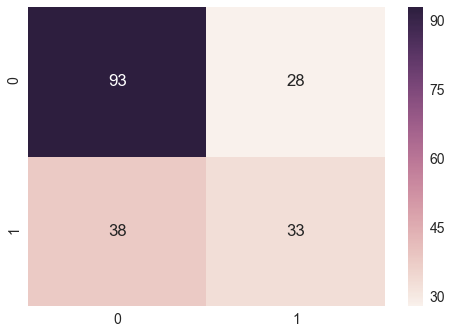

In [36]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[93,28],
     [38,33],
     ]    
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True)
sn.plt.show()

Confusion matrix, without normalization
[[93 28]
 [38 33]]


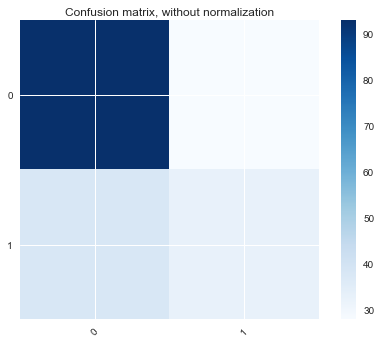

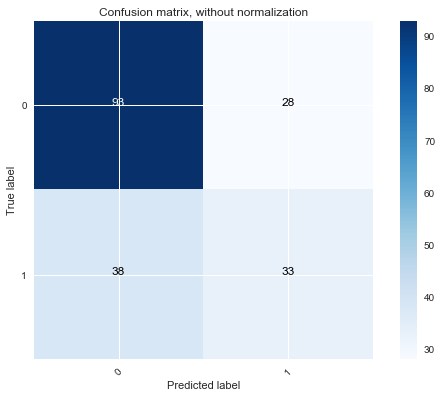

In [10]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

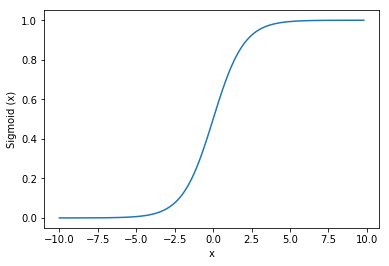

In [12]:
plt.plot(x,sig)
plt.show()
plt.xlabel('x')
plt.ylabel('Sigmoid (x)')


